This is the (EDA) for aramco stock data, EDA will help us with detect errors, identify trends,discover relationships,and make a decisions

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Loading data

In [9]:
df= pd.read_csv("Aramco.csv")
df.head(10)

,Date,Close,High,Low,Open,Volume
0,12/11/2019,22.352606,22.352606,22.352606,22.352606,38289394
1,12/12/2019,23.368637,24.575170,22.860623,24.575170,505692621
2,12/15/2019,23.749640,23.813142,23.368630,23.559135,98349281
3,12/16/2019,24.130653,24.194154,23.813145,23.813145,105973907
4,12/17/2019,23.971899,24.225905,23.813145,24.162403,142672245
5,12/18/2019,23.305134,23.876650,23.305134,23.813148,83822621
6,12/19/2019,22.543108,23.336880,22.543108,23.305128,108120197
7,12/22/2019,22.416105,22.670112,22.162099,22.606611,39709972
8,12/23/2019,22.606611,22.638361,22.384355,22.416106,35098090
9,12/24/2019,22.479609,22.670113,22.416106,22.638361,22184338


Data type of Columns

In [10]:
df.dtypes

Date       object
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

The data type inspection shows that several columns are stored as object types, including date  values. While categorical features are expected to be objects, date values stored as objects indicate formatting issues. Identifying such inconsistencies is important before proceeding with deeper analysis

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object

Chek missing values

In [12]:
print (df.isna().sum())

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


The missing values analysis shows whether any features contain null or undefined values.\nIf missing values are present, they can affect summary statistics and machine learning models.\nIn this dataset, the presence or absence of missing values helps determine whether data cleaning steps, such as imputation or row removal.

Chek Missing Values

In [13]:
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

NO. of rows and columns

In [14]:
print("Shape(row,columns):",df.shape,"\n")
print("number  of rows:",df.shape[0])
print("number  of columns:",df.shape[1])


Shape(row,columns): (1514, 6) 

number  of rows: 1514
number  of columns: 6


"The dataset consists of 1514 rows and 6 columns. This size is suitable for exploratory analysis and allows meaningful insights without being computationally expensive. Knowing the dataset dimensions helps in selecting appropriate analysis and visualization techniques.

Descriptive summary statistics

In [15]:
df.describe(include='all')

,Date,Close,High,Low,Open,Volume
count,1514,1514.000000,1514.000000,1514.000000,1514.000000,1.514000e+03
mean,2022-12-21 21:29:43.355350272,25.337110,25.479387,25.189289,25.338883,1.083187e+07
min,2019-12-11 00:00:00,17.653475,17.970983,17.145461,17.145461,0.000000e+00
25%,2021-06-14 06:00:00,23.519062,23.603179,23.450534,23.518239,4.466211e+06
50%,2022-12-20 12:00:00,25.181452,25.275131,25.036044,25.167764,7.548395e+06
75%,2024-07-03 18:00:00,27.455824,27.640616,27.272477,27.485013,1.247766e+07
max,2025-12-31 00:00:00,31.935476,32.574183,31.710049,31.935471,6.562831e+08
std,NaN,2.702074,2.735238,2.676777,2.712993,2.391855e+07


The descriptive statistics provide an overview of both numerical and categorical features. Numerical summaries reveal the central tendency, spread, and range of values, while categorical summaries show the number of unique categories and their frequencies. This confirms that the dataset contains a limited number of numerical features and several categorical features, making it descriptive in nature.

Univariate Analysis

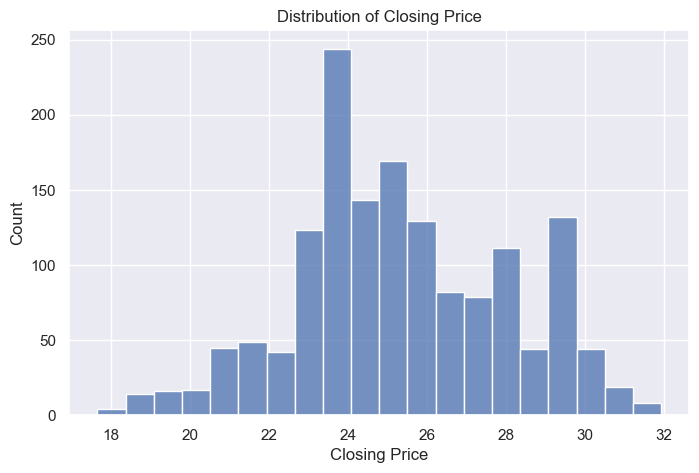

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], bins=20)
plt.title("Distribution of Closing Price")
plt.xlabel("Closing Price")
plt.ylabel("Count")
plt.show()

• Shows how the closing prices are distributed
 • Helps identify skewness and price concentration range

The distribution of the closing price appears slightly skewed, indicating that most trading days cluster within a certain price range, while fewer days show significantly higher or lower closing prices. This suggests relative price stability with occasional fluctuations, which is typical in stock market data.

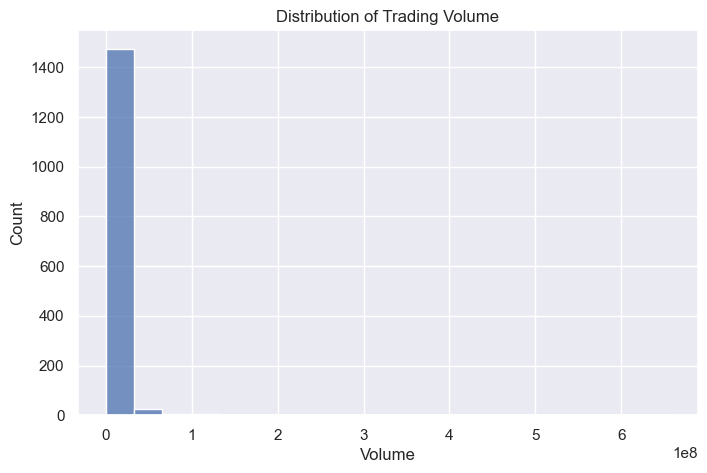

In [28]:
 plt.figure(figsize=(8,5))
sns.histplot(df['Volume'], bins=20)
plt.title("Distribution of Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Count")
plt.show()

The histogram shows that trading volume is strongly right-skewed. Most days have moderate trading activity, while a few days exhibit very high volume, possibly due to market events or increased investor interest.

 Bivariate Analysis

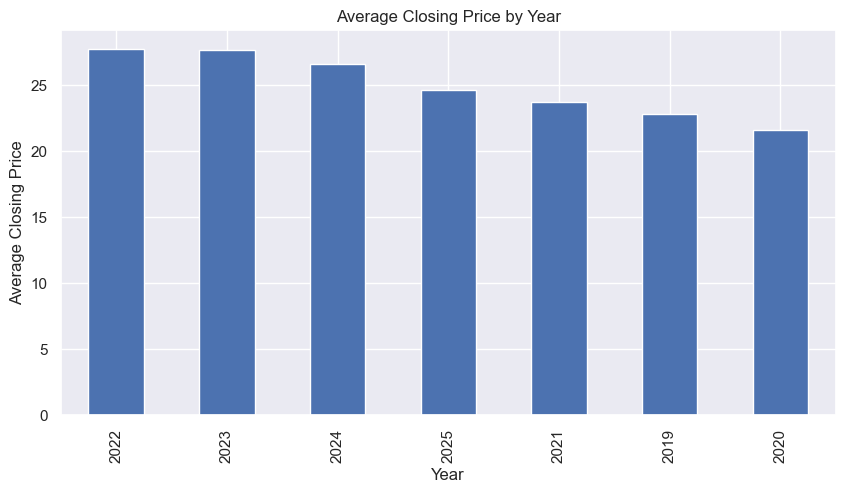

In [30]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
year_price = df.groupby('Year')['Close'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
year_price.plot(kind='bar')
plt.title("Average Closing Price by Year")
plt.ylabel("Average Closing Price")
plt.show()

This bar chart shows the average closing price of Aramco stock for each year. It helps compare stock performance across different years and identify periods of higher or lower average prices. Differences between bars indicate changes in overall stock value over time.

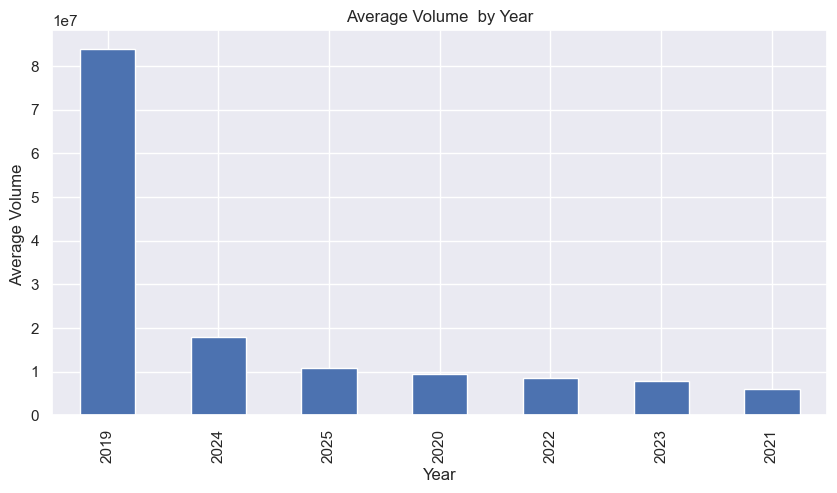

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
year_price = df.groupby('Year')['Volume'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
year_price.plot(kind='bar')
plt.title("Average Volume  by Year")
plt.ylabel("Average Volume ")
plt.show()

The chart compares the average annual trading volume of Aramco stock. It shows noticeable variation between years, indicating changes in trading activity and investor participation over time.

Average Closing Price by Year

In [33]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year

year_close = df.groupby('Year')['Close'].mean().sort_values(ascending=False)
year_close.head(10)

Year
2022    27.798063
2023    27.703162
2024    26.667102
2025    24.672429
2021    23.745333
2019    22.860619
2020    21.631790
Name: Close, dtype: float64

High VS Low Relationship

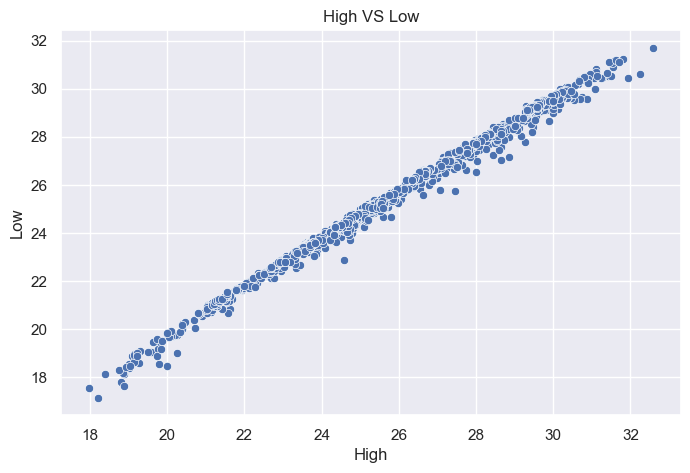

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="High",y='Low',data=df)
plt.title('High VS Low')
plt.show()

The plot reveals a strong positive correlation between high and low prices. When the high price increases, the low price increases as well, indicating consistent daily price movement.

Correlation Matrix

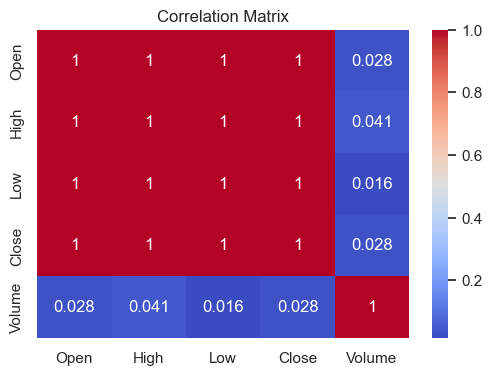

In [36]:


plt.figure(figsize=(6,4))

sns.heatmap(
    df[['Open','High','Low','Close','Volume']].corr(),
    annot=True,
    cmap='coolwarm'
)

plt.title("Correlation Matrix")
plt.show()

The heatmap indicates that stock price variables are highly correlated with each other. However, trading volume has a weak relationship with prices, meaning volume changes do not strongly affect price movement.

Time-Based Analysis

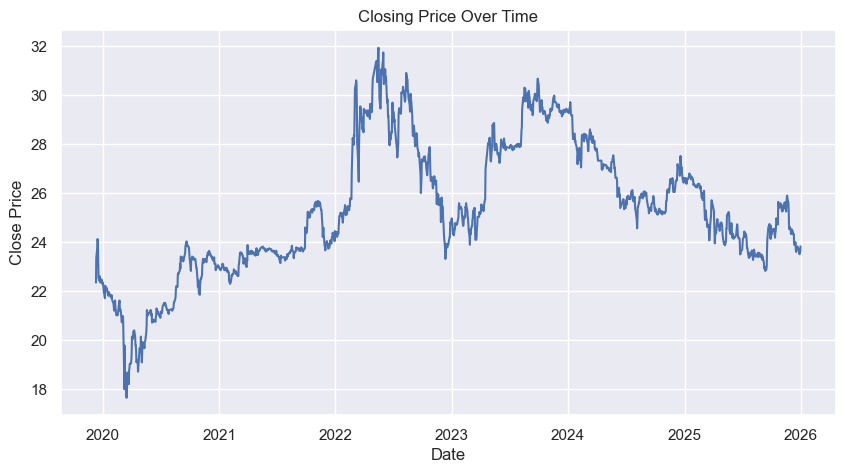

In [37]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'])
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

The chart shows how the closing price changes over time. The stock experienced a noticeable increase around 2022, followed by fluctuations and moderate declines in later years, indicating normal market volatility.